# Qiskit Scratch Work
This notebook contains scratch work from learning how to IMB's quantum Qiskit package.

In [15]:
from dotenv import load_dotenv
from qiskit import QuantumCircuit, transpile
from qiskit_aer.primitives import Estimator
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt
import numpy as np
import os
import qiskit

load_dotenv()
API_TOKEN = os.getenv("API_TOKEN")

AttributeError: module 'numpy' has no attribute 'lib'

## Install Qiskit
This section follows the installation section from the [IBM Quantum Documentation](https://docs.quantum.ibm.com/guides/install-qiskit).

In [ ]:
qiskit.__version__

'1.3.1'

In [4]:
service = QiskitRuntimeService(channel="ibm_quantum", token=API_TOKEN)

"""AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'"""
# QiskitRuntimeService.save_account(channel="ibm_quantum", token=API_TOKEN) 

backend = service.backend(name="ibm_brisbane")

In [ ]:
backend.num_qubits

127

## Create your first quantum program in Qiskit
This section follows the `README.md` from the [GitHub repo](https://github.com/Qiskit/qiskit).

In [ ]:
# 1. A quantum circuit for preparing the quantum state |000> + i |111>
qc_example = QuantumCircuit(3)
qc_example.h(0)          # generate superpostion
qc_example.p(np.pi/2,0)  # add quantum phase
qc_example.cx(0,1)       # 0th-qubit-Controlled-NOT gate on 1st qubit
qc_example.cx(0,2)       # 0th-qubit-Controlled-NOT gate on 2nd qubit

# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc_example.measure_all(inplace=False)

# 3. Execute using the Sampler primitive
sampler = StatevectorSampler()
job = sampler.run([qc_measured], shots=1000)
result = job.result()
print(f" > Counts: {result[0].data['meas'].get_counts()}")

# 2. Define the observable to be measured
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# 3. Execute using the Estimator primitive
estimator = StatevectorEstimator()
job = estimator.run([(qc_example, operator)], precision=1e-3)
result = job.result()
print(f" > Expectation values: {result[0].data.evs}")

qc_transpiled = transpile(qc_example, basis_gates = ['cz', 'sx', 'rz'], coupling_map =[[0, 1], [1, 2]] , optimization_level=3)

 > Counts: {'111': 492, '000': 508}
 > Expectation values: 4.000828549687443


## Hello World
This section follows the [Hello World](https://docs.quantum.ibm.com/guides/hello-world) section of the IBM quantum documentation.

Matplotlib is building the font cache; this may take a moment.


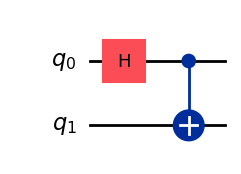

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw(output='mpl')

In [12]:
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
observables = [ZZ, ZI, IZ, XX, XI, IX]
estimator = Estimator()
job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([1.        , 0.00195312, 0.00195312, 1.        , 0.        ,
       0.        ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.002377701, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.0008452, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 7886, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999961853027344, 'simulator_metadata': [{'time_taken': 0.002377701, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.0008452, 'a

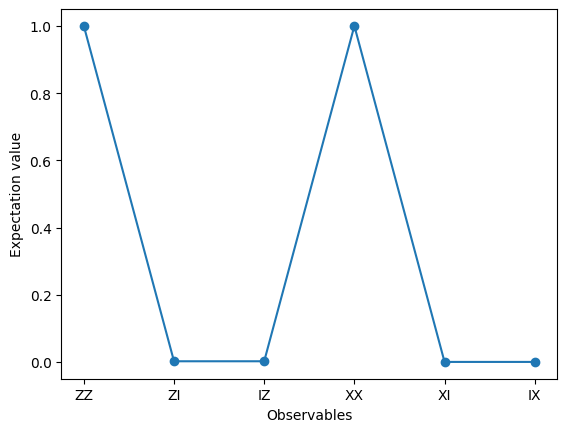

In [14]:
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values
plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

In [ ]:
def get_qc_for_n_qubit_GHZ_state(n: int) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc


n = 3
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

NameError: name 'QuantumCircuit' is not defined